# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [5]:
monthly_average_rentals = df['count'].resample('ME').mean()

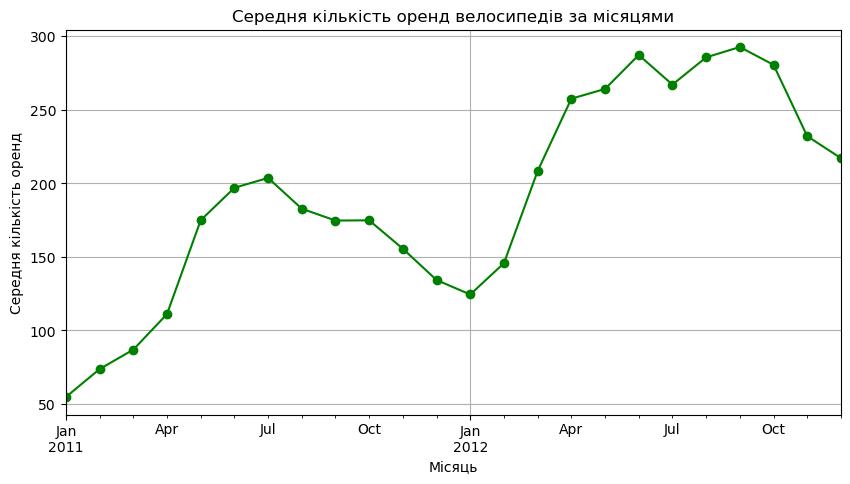

In [34]:
monthly_average_rentals.plot(
    figsize = (10, 5),
    marker = 'o',
    color='green',
    title = 'Середня кількість оренд велосипедів за місяцями',
    xlabel = 'Місяць',
    ylabel = 'Середня кількість оренд',
    grid = True
);

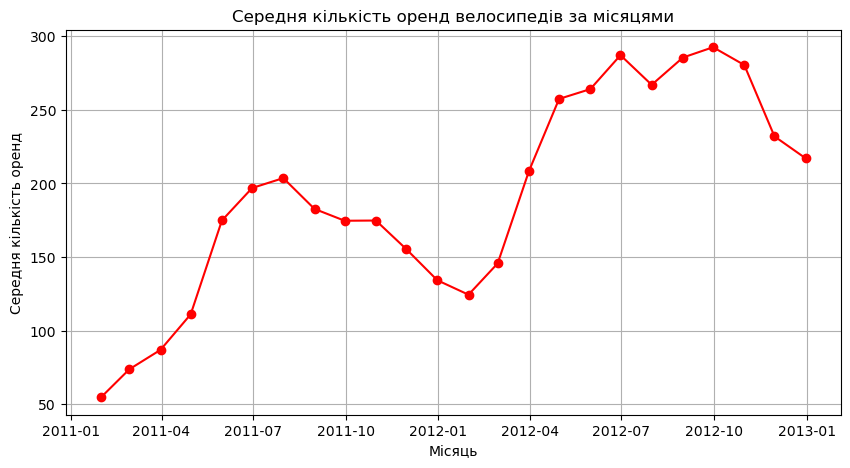

In [31]:
plt.figure(figsize = (10, 5))
plt.plot(monthly_average_rentals, '-or')
plt.title('Середня кількість оренд велосипедів за місяцями')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд'),
plt.grid(True)

Графік, побудований за допомогою **Pandas (DataFrame.plot())**, має підписані місяці на осі X і лінія починається точно з країв фігури. Однак у нього є недолік: сітка горизонтальна, а вертикальних ліній майже немає — лише одна на межі років.

Графік, створений через **Matplotlib**, навпаки, має детальну сітку як по горизонталі, так і по вертикалі, що робить його більш інформативним. Проте вісь X підписана у форматі 'YYYY-MM' замість назв місяців, і лінія має відступи від початку та кінця графіка.

Загалом мені більше подобається другий варіант — завдяки щільній, добре структурованій сітці він виглядає значно професійніше та наочніше.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [36]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

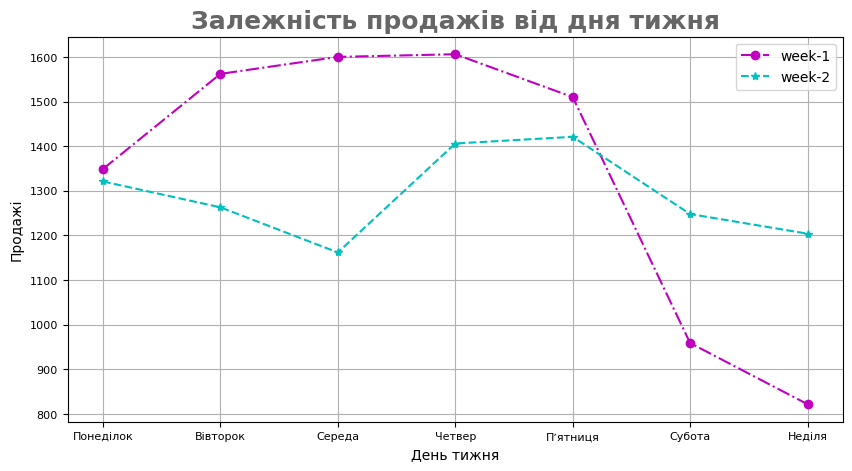

In [97]:
day_labels = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя']
plt.figure(figsize = (10, 5))
plt.plot(days, sales_week1, '-.om', label='week-1')
plt.plot(days, sales_week2, '--*c', label='week-2')
plt.title('Залежність продажів від дня тижня',
          fontsize = 18, fontweight = 'bold', color = '#666666')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, day_labels, size = 8)
plt.yticks(size = 8)
plt.grid(True)
plt.legend();

**1. Судячи з графіку, в який тиждень проодажі були стабільніше?**.  
Продажі були значно стабільніші у **другий тиждень (week-2)**. Це видно візуально: лінія week-2 демонструє менші коливання протягом тижня, ніж лінія week-1, яка має дуже різкий спад у суботу та неділю.    
**2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.**.  
Так, для підтвердження стабільності найкраще використовувати статистичні показники розкиду даних:    
 - **Діапазон (Range)** - різниця між максимальним і мінімальним значеннями.   
    Діапазон для першого тижня: 1606 - 822 = 784.  
    Діапазон для другого тижня: 1421 - 1162 = 259.  
Оскільки діапазон продажів у другий тиждень (259) утричі менший за діапазон першого тижня (780), це однозначно підтверджує, що продажі були стабільніші у другий тиждень.
 - **Стандартне відхилення (Standard Deviation)** - найточніший показник стабільності. Чим менше стандартне відхилення, тим менше дані відхиляються від середнього значення, і тим стабільніші продажі.  
Стандартне відхилення 1-го тижня: 299.    
Стандартне відхилення 2-го тижня: 90

In [105]:
print (f'Діапазон для 1-го тижня: {max(sales_week1) - min(sales_week1)}')
print (f'Діапазон для 2-го тижня: {max(sales_week2) - min(sales_week2)}')

Діапазон для 1-го тижня: 784
Діапазон для 2-го тижня: 259


In [108]:
print (f'Стандартне відхилення 1-го тижня: {int(np.std(sales_week1))}')
print (f'Стандартне відхилення 2-го тижня: {int(np.std(sales_week2))}')

Стандартне відхилення 1-го тижня: 299
Стандартне відхилення 2-го тижня: 90


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

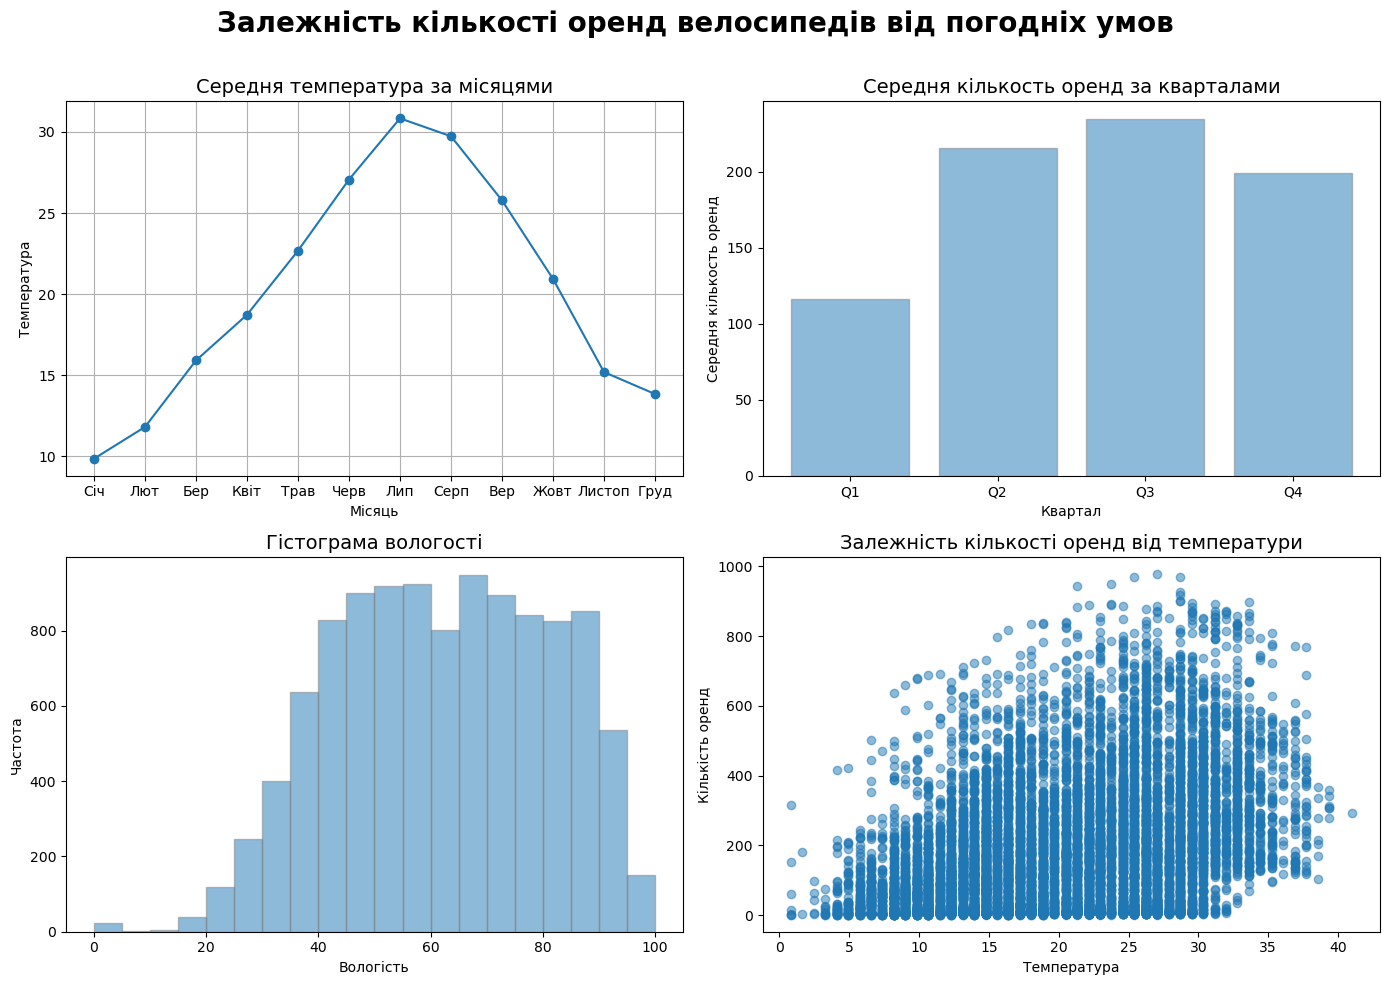

In [220]:
plt.figure(figsize = (14, 10))
plt.suptitle('Залежність кількості оренд велосипедів від погодніх умов', fontweight='bold', fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(df.groupby(['month'])['temp'].mean(), '-o')
plt.title('Cередня температура за місяцями', fontsize=14)
plt.xlabel('Місяць')
plt.xticks(range(1, 13), ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв', 'Лип', 'Серп', 'Вер', 'Жовт', 'Листоп', 'Груд'])
plt.ylabel('Температура')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.bar(df.season.unique(), df.groupby(['season'])['count'].mean(), alpha=0.5, edgecolor='grey')
plt.title('Середня кількость оренд за кварталами', fontsize=14)
plt.xlabel('Квартал')
plt.xticks(sorted(df.season.unique()), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.ylabel('Середня кількость оренд')

plt.subplot(2, 2, 3)
plt.hist(df.humidity, edgecolor='grey', alpha=0.5, bins=20)
plt.title('Гістограма вологості', fontsize=14)
plt.xlabel('Вологість')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.5);
plt.title('Залежність кількості оренд від температури', fontsize=14)
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.97])

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

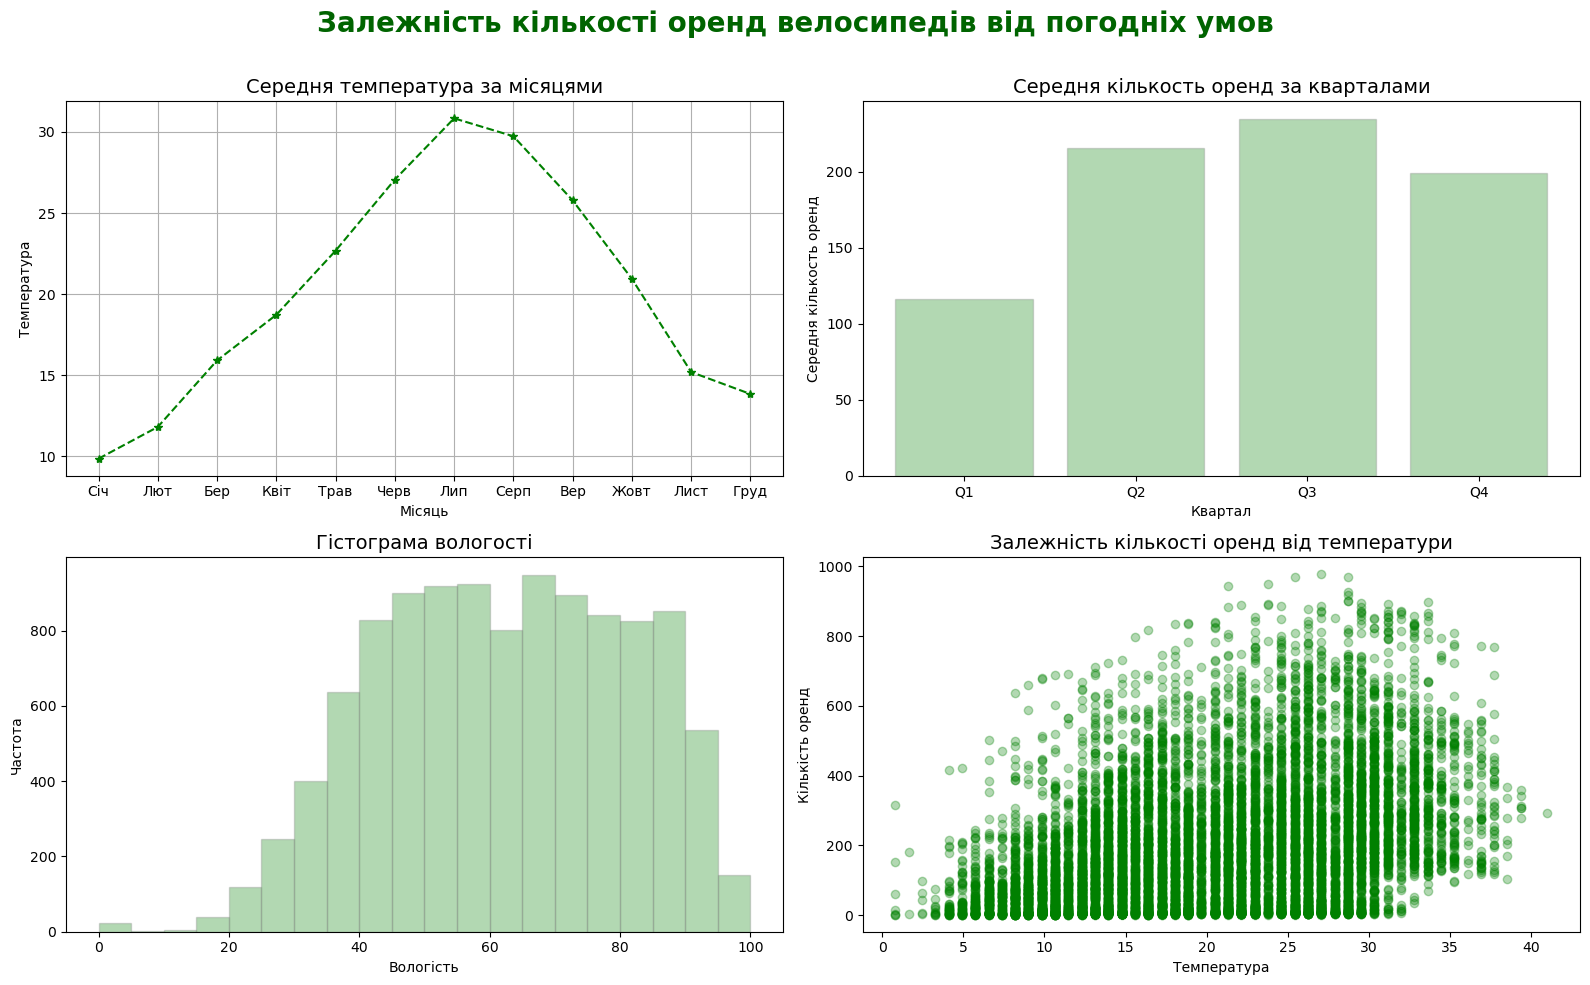

In [250]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

ax[0][0].plot(df.groupby(['month'])['temp'].mean(), '--*g')
ax[0][0].set_title('Cередня температура за місяцями', fontsize=14)
ax[0][0].set_xlabel('Місяць')
ax[0][0].set_xticks(range(1, 13), ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв', 'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд'])
ax[0][0].set_ylabel('Температура')
ax[0][0].grid(True)

ax[0][1].bar(df.season.unique(), df.groupby(['season'])['count'].mean(), color = 'green', alpha=0.3, edgecolor='grey')
ax[0][1].set_title('Середня кількость оренд за кварталами', fontsize=14)
ax[0][1].set_xlabel('Квартал')
ax[0][1].set_xticks(sorted(df.season.unique()), ['Q1', 'Q2', 'Q3', 'Q4'])
ax[0][1].set_ylabel('Середня кількость оренд')

ax[1][0].hist(df.humidity, edgecolor='grey', color = 'green', alpha=0.3, bins=20)
ax[1][0].set_title('Гістограма вологості', fontsize=14)
ax[1][0].set_xlabel('Вологість')
ax[1][0].set_ylabel('Частота')

ax[1][1].scatter(df['temp'], df['count'], color = 'green', alpha=0.3);
ax[1][1].set_title('Залежність кількості оренд від температури', fontsize=14)
ax[1][1].set_xlabel('Температура')
ax[1][1].set_ylabel('Кількість оренд')

fig.suptitle('Залежність кількості оренд велосипедів від погодніх умов', fontweight='bold', fontsize=20, color = 'darkgreen')
plt.tight_layout(rect=[0, 0, 1, 0.97])

**Чим відрізняється підхід побудови кількох графіків на одній фігурі з plt.subplots() від plt.subplot()?**.    
**plt.subplot()** — cтворює один підграфік за раз, тому кожного разу потрібно викликати subplot, щоб створити черговий графік у певній комірці. Потрібно самостійно стежити, який графік у якій позиції.

**plt.subplots()** — одразу створює всю сітку графіків і повертає зручні об’єкти-оси (ax). Завдяки цьому до кожного графіка можна легко звернутися, окремо його налаштовувати. Код виходить чистішим і зрозумілішим.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

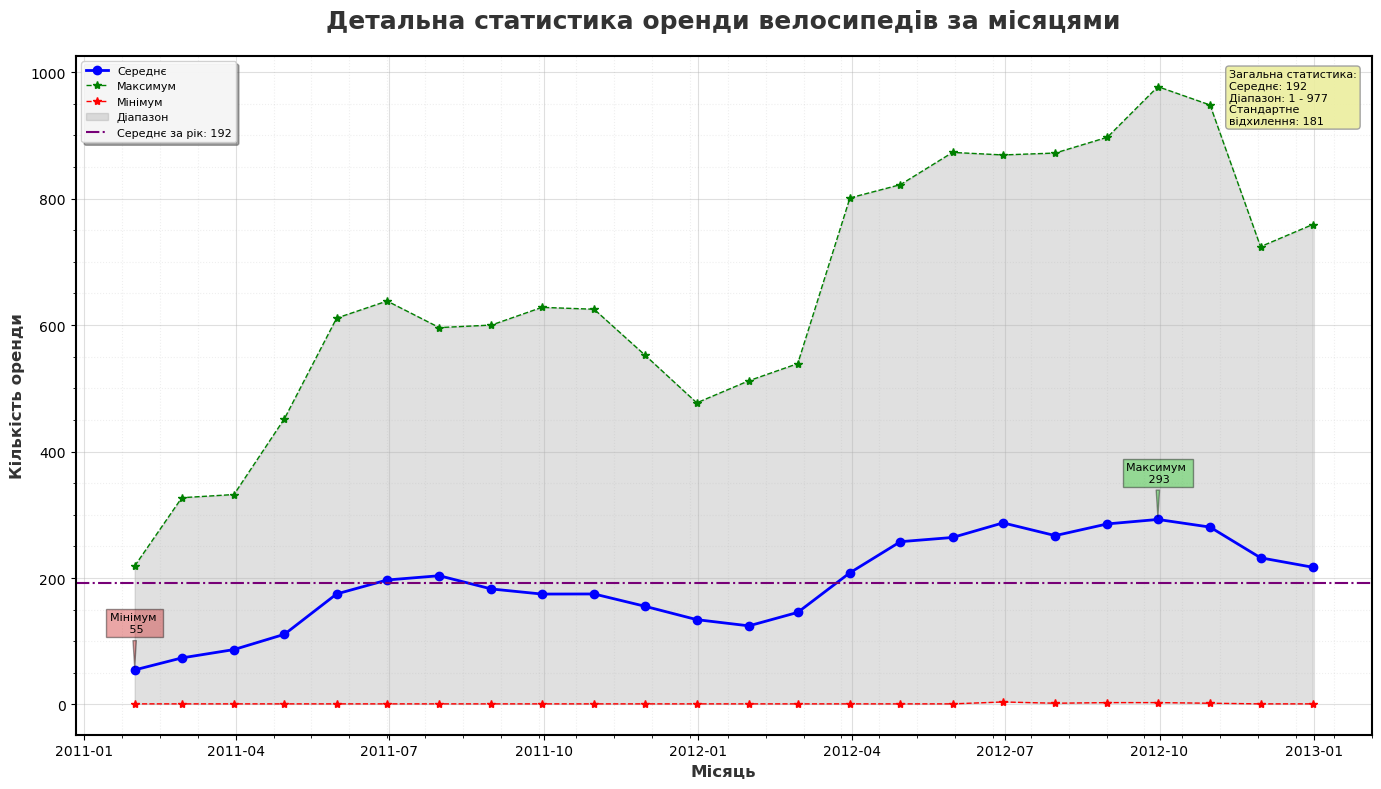

In [526]:
monthly_rentals = df['count'].resample('ME').agg(['mean', 'max', 'min'])

fig, ax = plt.subplots(figsize = (14, 8))

ax.plot(monthly_rentals['mean'], '-ob', label='Середнє', linewidth=2, markersize=6)
ax.plot(monthly_rentals['max'], '--*g', label='Максимум', linewidth=1, markersize=6)
ax.plot(monthly_rentals['min'], '--*r', label='Мінімум', linewidth=1, markersize=6)

ax.set_xlabel('Місяць', fontsize=12, fontweight='bold', color = '#333')
ax.set_ylabel('Кількість оренди', fontsize=12, fontweight='bold', color = '#333')
ax.set_title('Детальна статистика оренди велосипедів за місяцями', fontsize=18,
             fontweight='bold', pad=20, color = '#333')

# Заливка між max та min
ax.fill_between(monthly_rentals.index, monthly_rentals['max'], monthly_rentals['min'],
                color = '#999', alpha = 0.3, label='Діапазон')

# Додаю анотації для екстремальних значень
#max
max_ind = monthly_rentals['mean'].idxmax()
max_val = monthly_rentals['mean'].max()
ax.annotate(f'Максимум \n {max_val:.0f}', 
            xy=(max_ind, max_val), xytext=(max_ind, max_val + 60), ha='center', fontsize = 8,
bbox= dict(boxstyle="square, pad=0.3", facecolor='#2c2', alpha=0.4),
arrowprops=dict(facecolor ='#2c2', arrowstyle='wedge', alpha=0.4))

#min
min_ind = monthly_rentals['mean'].idxmin()
min_val = monthly_rentals['mean'].min()
ax.annotate(f'Мінімум \n {min_val:.0f}', 
            xy=(min_ind, min_val), xytext=(min_ind, min_val + 60), ha='center', fontsize = 8,
bbox= dict(boxstyle="square, pad=0.3", facecolor='#c22', alpha=0.4),
arrowprops=dict(facecolor ='#c22', arrowstyle='wedge', alpha=0.4))

#Додаю середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, label=f'Середнє за рік: {overall_mean:.0f}',
           linestyle='-.', color = '#707')

# Додаю сітку
ax.grid(True, which='major', linestyle='-', alpha=0.4)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Легенда
ax.legend(loc = 'upper left', fontsize=8, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9, facecolor='#fff');

# Текстовий блок зі статистикою
textstr=f'Загальна статистика:\nСереднє: {df['count'].mean():.0f}\n'
textstr+=f'Діапазон: {df['count'].min()} - {df['count'].max()}\n'
textstr+=f'Стандартне \nвідхилення: {df['count'].std():.0f}'
props=dict(boxstyle='round', facecolor='#ecee9e', alpha=0.9, edgecolor='#999')
ax.text(0.89, 0.98, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props);

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()


**1. Яка перевага додавання анотацій на графік?**.  
Анотації виділяють ключові точки чи події на графіку, роблячи його зрозумілішим, допомагаючи швидко побачити важливі інсайти.    
**2. Для чого використовується fill_between()?**  
fill_between() заповнює область між кривими або між кривою та віссю — це допомагає візуально підкреслити різницю, тренд або діапазон значень.     
**3. Як текстовий блок допомагає в інтерпретації даних?**.  
Текстовий блок дозволяє додати короткий опис, цифри або висновки прямо на графік, щоб глядач одразу зрозумів основні факти без додаткових пояснень.